In [474]:
import pandas as pd
import numpy as np
import csv
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.patches as mpatches

In [475]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

,image_id,terrain_undefined,Red,Green
0,jpgs/S26047238.jpg,1,66,81
1,jpgs/P26057146.jpg,0,75,72
2,jpgs/P26054308.jpg,0,76,70
3,jpgs/P26050957.jpg,1,74,80
4,jpgs/P26057962.jpg,0,65,61


In [476]:
train_data.describe()

,terrain_undefined,Red,Green
count,130.000000,130.000000,130.000000
mean,0.500000,72.284615,74.738462
std,0.501934,8.006039,9.152925
min,0.000000,52.000000,55.000000
25%,0.000000,68.000000,68.250000
50%,0.500000,73.000000,76.000000
75%,1.000000,78.000000,81.000000
max,1.000000,93.000000,95.000000


In [477]:
train_data = train_data.drop(['image_id'], axis=1)
train_data.head()

,terrain_undefined,Red,Green
0,1,66,81
1,0,75,72
2,0,76,70
3,1,74,80
4,0,65,61


In [478]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
terrain_undefined    130 non-null int64
Red                  130 non-null int64
Green                130 non-null int64
dtypes: int64(3)
memory usage: 3.1 KB


[[76.88607595 80.63291139]
 [65.15686275 65.60784314]]


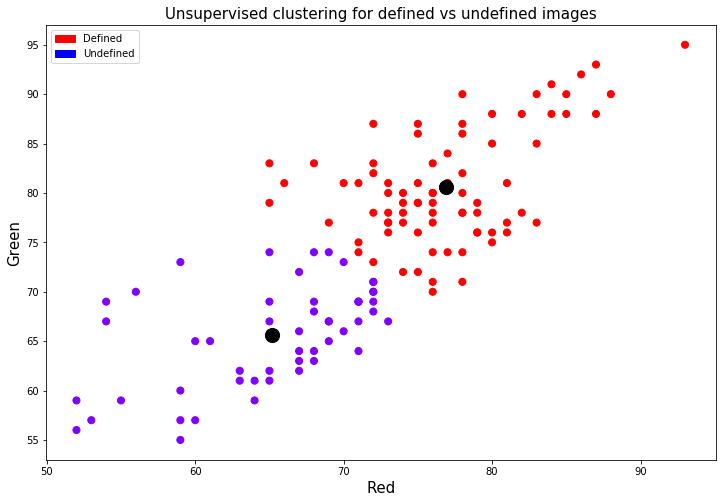

In [479]:
X = np.array(train_data.drop(['terrain_undefined'], 1).astype(float))
y = kmeans.predict(X)
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

matplotlib.rc('axes', labelsize=15)
matplotlib.rc('axes', titlesize=15)
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=200, cmap='rainbow',
            color='black')

plt.xlabel('Red')
plt.ylabel('Green')
defined = mpatches.Patch(color='red', label='Defined')
undefined = mpatches.Patch(color='blue', label='Undefined')
plt.legend(handles=[defined,undefined])
plt.title("Unsupervised clustering for defined vs undefined images")
plt.savefig('cluster_image.png', dpi = 100)
plt.show()

In [480]:
test_data = train_data.drop(['terrain_undefined'], axis=1)
test_data.head()

,Red,Green
0,66,81
1,75,72
2,76,70
3,74,80
4,65,61


In [472]:
X_train, X_test, y_train, y_test = train_test_split(test_data, train_data['terrain_undefined'], random_state=2)
print(X_train.shape, X_test.shape)

(97, 2) (33, 2)


In [473]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
accuracy_score(y_test, ypred)

C:\Users\rinty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8181818181818182